In [ ]:
#3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and
#print the corresponding state/ut, district, murders, and year in descending order.

In [9]:
import pandas as pd

crime_data = pd.read_excel("https://github.com/priyadeepgupta/capstone/raw/main/Crime_Data.xlsx", sheet_name="data frame")

print(crime_data.head())
print(crime_data.columns)


      STATE/UT     DISTRICT  Year  Max_Rapes  Max_Kidnappings
0  WEST BENGAL  MURSHIDABAD  2009        568              342
1  WEST BENGAL  MURSHIDABAD  2010        526              441
2  WEST BENGAL  MURSHIDABAD  2011        433              492
3  WEST BENGAL  MURSHIDABAD  2007        369              123
4  WEST BENGAL   JALPAIGURI  2008        334              239
Index(['STATE/UT', 'DISTRICT', 'Year', 'Max_Rapes', 'Max_Kidnappings'], dtype='object')


In [10]:
import pandas as pd

crime_data = pd.read_excel("https://github.com/priyadeepgupta/capstone/raw/main/Crime_Data.xlsx", sheet_name="data frame")

district_counts = crime_data['DISTRICT'].value_counts()
districts_three_or_more = district_counts[district_counts >= 3].index.tolist()
filtered_data = crime_data[crime_data['DISTRICT'].isin(districts_three_or_more)]

district_year_counts = filtered_data.groupby(['STATE/UT', 'DISTRICT']).size()

districts_three_or_more_years = district_year_counts[district_year_counts >= 3].index

final_data = filtered_data[filtered_data[['STATE/UT', 'DISTRICT']].apply(lambda x: (x['STATE/UT'], x['DISTRICT']) in districts_three_or_more_years, axis=1)]

final_data.sort_values(by=['STATE/UT', 'DISTRICT', 'Year'], ascending=[True, True, False], inplace=True)

print(final_data[['STATE/UT', 'DISTRICT', 'Max_Rapes', 'Year']])


           STATE/UT        DISTRICT  Max_Rapes  Year
5372  A & N ISLANDS         ANDAMAN         13  2011
3807  A & N ISLANDS         ANDAMAN         23  2010
4522  A & N ISLANDS         ANDAMAN         18  2009
5561  A & N ISLANDS         ANDAMAN         12  2008
6828  A & N ISLANDS         ANDAMAN          6  2006
...             ...             ...        ...   ...
1256    WEST BENGAL  UTTAR DINAJPUR         53  2005
1560    WEST BENGAL  UTTAR DINAJPUR         47  2004
3643    WEST BENGAL  UTTAR DINAJPUR         24  2003
4221    WEST BENGAL  UTTAR DINAJPUR         20  2002
2828    WEST BENGAL  UTTAR DINAJPUR         31  2001

[8508 rows x 4 columns]


C:\Users\sanja\AppData\Local\Temp\ipykernel_28152\589792001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.sort_values(by=['STATE/UT', 'DISTRICT', 'Year'], ascending=[True, True, False], inplace=True)


In [ ]:
#3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

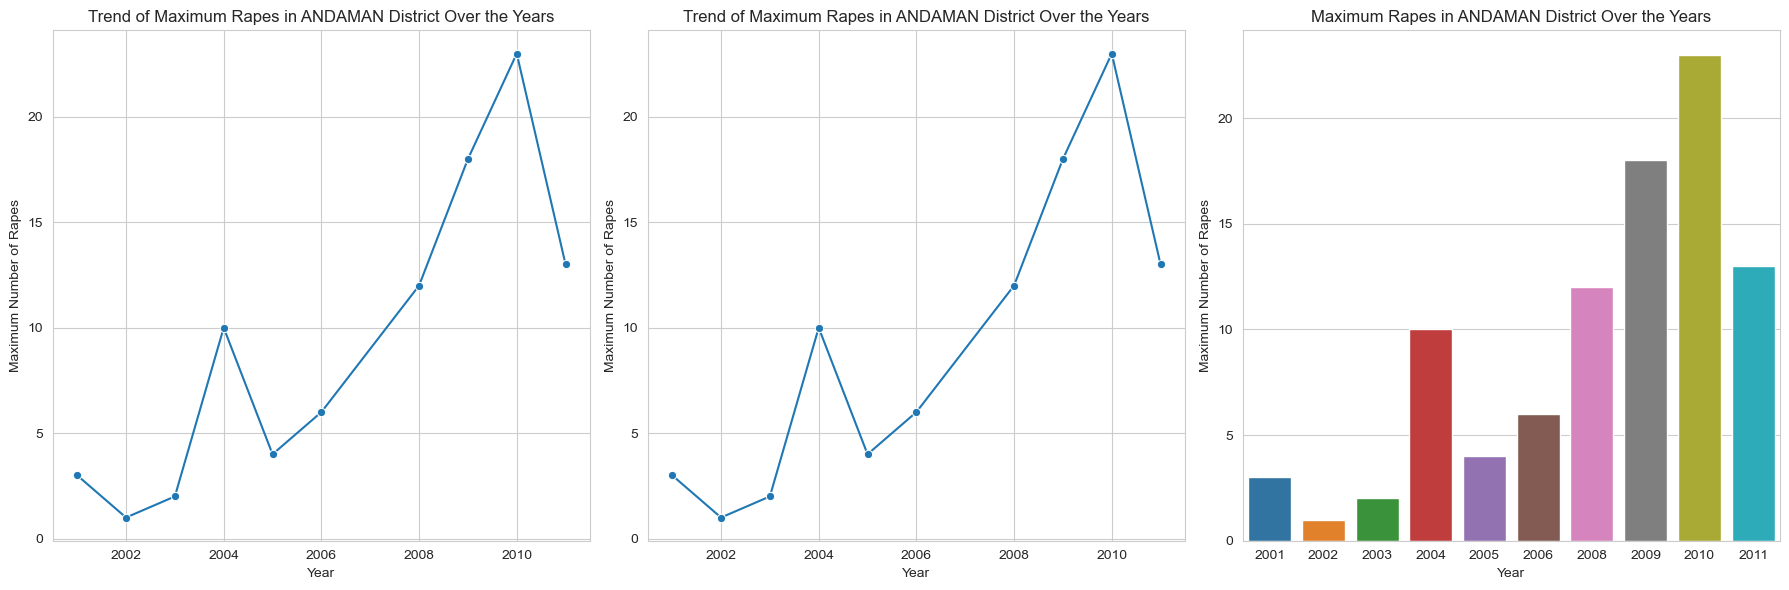

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

district_to_visualize = 'ANDAMAN'

data_for_district = final_data[final_data['DISTRICT'] == district_to_visualize]

if not data_for_district.empty:
    
    plt.figure(figsize=(18, 6))

    
    plt.subplot(1, 3, 1)
    sns.lineplot(data=data_for_district, x='Year', y='Max_Rapes', marker='o')
    plt.title(f'Trend of Maximum Rapes in {district_to_visualize} District Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Maximum Number of Rapes')

    
    plt.subplot(1, 3, 2)
    sns.lineplot(data=data_for_district, x='Year', y='Max_Rapes', marker='o')
    plt.title(f'Trend of Maximum Rapes in {district_to_visualize} District Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Maximum Number of Rapes')

    
    plt.subplot(1, 3, 3)
    sns.barplot(data=data_for_district, x='Year', y='Max_Rapes')
    plt.title(f'Maximum Rapes in {district_to_visualize} District Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Maximum Number of Rapes')

    plt.tight_layout()
    plt.show()
else:
    print(f"No valid data points available for {district_to_visualize} District.")
